# HW 1: Theory

This particular homework will not require you to turn in extraneous code so just write in your answers into this Jupyter notebook.  Please note that there is a bit of literature searching that I am requiring you to do though and this will **absolutely** require you to cite what you find.  Citations must be done properly, not just URLs.  If you have any issues doing so please reach out to [me](http://www.columbia.edu/~ktm2132/) or your [local friendly librarian](https://library.columbia.edu). 

## 1 - Amdahl's Law 

**(a)** [15] Consider the following bit of code and estimate the proportion of serial vs. parallelizable code.
```python
a = empty(N)
b = empty(N)
for i in range(N):
    a[i] = f(i)
    
for i in range(N):
    b[i] = g(i, a)
```
Assume in this case that $g(\cdot)$ is a function that can be run independently from other functions while $f(\cdot)$ cannot.  Your solution may need to depend on $N$.

Explain your answer by annotating the code above.

**(b)** [15] Plot the number of processes vs. the resulting expectation of efficiency/speedup and compare to the limits of Amdahl's law.

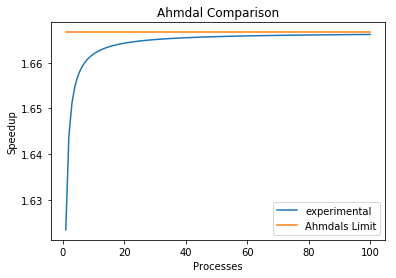

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline  
#number of processes 
N = 100
X = np.linspace(1,N,N)

#compuational intensity
C = 20

#number of servers
M = 5

#Speedup ratio
R = (X*(C+3)+3 + X*(C+3)+1)/(X*(C+3)+3 + (X*(C+3)+1)/M)
S = np.ones(N)*(1/(.5/M + .5))

plt.xlabel('Processes')
plt.ylabel('Speedup')
plt.title('Ahmdal Comparison')
plt.plot(X,R, label = 'experimental')
plt.plot(X,S, label = 'Ahmdals Limit')
plt.legend()
plt.show()

**(c)** [10] Confirm the importance of reducing the amount of serial $S$ code by plotting $S$ vs. efficiency/speedup using Amdahl's Law.

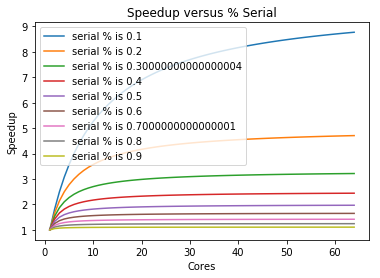

In [3]:
K = 64
X = np.linspace(1,K,K)

for s in np.linspace(.1,.9,9):
    S = np.ones(K)*(1/((1-s)/X + s))
    plt.plot(X,S, label = 'serial % is ' + str(s))

plt.xlabel('Cores')
plt.ylabel('Speedup')
plt.title('Speedup versus % Serial')

plt.legend()
plt.show()

## 2 - Roofline Models

**(a)** [15] Pick a _specific_ chip and compute a roof-line model for it.  Feel free to make some assumptions as you will probably need to get the true memory bandwidth to main-memory.  Plot this roof-line model and justify the model.

Processor: Intel Core i7-8650U (My Laptop Chip)
Max Memory Bandwidth: 37.5 x 10^9 B/s
Cores: 4
Max per Core Frequency: 4.2 x 10^9 Hz

CItation:
“Intel® Core™ i7-8650U Processor (8M Cache, up to 4.20 GHz) Product Specifications.” (8M Cache, up to 4.20 GHz) Product Specifications, ark.intel.com/content/www/us/en/ark/products/124968/intel-core-i7-8650u-processor-8m-cache-up-to-4-20-ghz.html. 

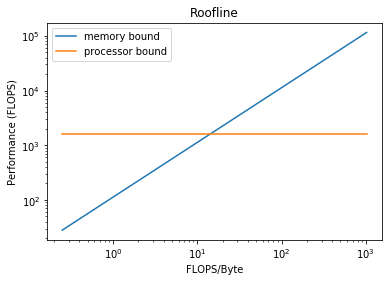

In [8]:
a=-2
b= 10
n = b-a+1

#FLOPS/Byte
I = np.logspace(a,b,n,base = 2)

#Performance in FLOPS:

#Memory Bound
beta = 37.5*(10^9)
P = beta*I
#Processor Bound
Hz = 4.2*(10^9)
Cores =4
B = 32
R = Cores*Hz*B

R = np.ones(n)*R

plt.loglog(I,P, label = 'memory bound')
plt.loglog(I,R, label = 'processor bound')

plt.xlabel('FLOPS/Byte')
plt.ylabel('Performance (FLOPS)')
plt.title('Roofline')

plt.legend()
plt.show()

**(b)** [10] Estimate the arithmetic intensity of the matrix vector product and plot it on your roof-line model.

Let the matrix be N x N and the vector of size N. 
The number of additions and multiplication operations:
N*(2N +1)
The number of Bytes/Numbers called on:
N^2 + N

Arithmetic intensity:
N*(2N +1)/(N^2 + N)

In the far limit of N getting large intensity approaches 2.

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


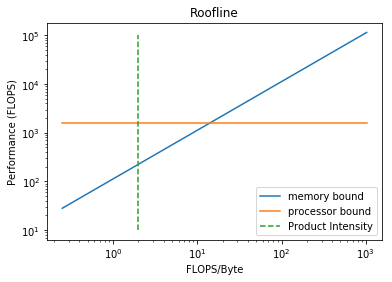

In [29]:
x = np.ones(n)*2
y = np.logspace(1,5,n)
plt.loglog(I,P, label = 'memory bound')
plt.loglog(I,R, label = 'processor bound')
plt.plot(x,y, linestyle='dashed', label = 'Product Intensity')

plt.xlabel('FLOPS/Byte')
plt.ylabel('Performance (FLOPS)')
plt.title('Roofline')

plt.legend()
plt.show()

**(c)** [15] Look through the scientific and engineering literature for articles that discuss their estimate for their arithmetic intensity and plot it on your model above.  Discuss how they came to their conclusion.

The above description assumes optimality. This would assume that I can load all my data into the "fast memory." The data may not fit. 

In reality there is multiple calls for the same data from the "slow memory" because you have to dump and and recall the same data later. This will reduce the arithmetic intensity as the Bytes called is now higher due to 'redundancy.' Say you have to reread each bit of the N x N matrix twice this would half our intensity. 

This can be offset by paralellism. Why, you ask? Well we can use the same set of memory simultaneously over in parallel bringing our intensity somewhatback up. 

Yet once again the former effect is reduced if processes try to acess the same memory at the same time. 


Citations:
“Performance and Algorithmic Research.” Introduction, crd.lbl.gov/departments/computer-science/par/research/roofline/introduction/. 

Williams, Samuel, Andrew Waterman, and David Patterson. "Roofline: an insightful visual performance model for multicore architectures." Communications of the ACM 52.4 (2009): 65-76.

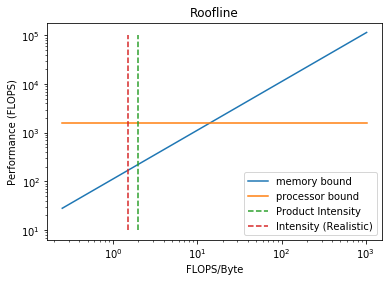

In [31]:
x2 = np.ones(n)*1.5

plt.loglog(I,P, label = 'memory bound')
plt.loglog(I,R, label = 'processor bound')
plt.plot(x,y, linestyle='dashed', label = 'Product Intensity')
plt.plot(x2,y, linestyle='dashed', label = 'Intensity (Realistic)')

plt.xlabel('FLOPS/Byte')
plt.ylabel('Performance (FLOPS)')
plt.title('Roofline')

plt.legend()
plt.show()

## 3 - Scalability

[20] Explore the scientific and engineering literature for discussions of approaches to problems with an emphasis on scalability.  For instance, if you wanted to solve for the first few eigenvalues of a matrix, what is the most scalable way to do so (do not do this one).  You can pick from any field.

Well looks like scalabiliy can be bound in different ways. Time, memory, or problem specific bound [1]. We have to check and consider all of these when considering scalability. 

The divide and conquer routine helps with the memory problem whereas power method would require a large memory storage. Yet the divide and conquer would not scale as well time wise. 

Citations:
[1] Bryant, Randal. “Lecture Notes: Workload-Driven Performance Evaluation.” Carnegie Melon University, Http://Www.cs.cmu.edu/Afs/Cs/Academic/Class/15418-s19/Www/Lectures/10_perfeval.Pdf, 2019, Website. 

[2] Saad, Yousef. "Numerical methods for large eigenvalue problems." SIAM, (2011)